In [2]:
import numpy as np
import matplotlib.pyplot as plt


- Frequency is average number of exposures 
- Reach is net unduplicated audience 

$$GRPs = Viewers Counted Once * Average Number of times they view$$
$$GRPs = Reach * Frequency$$

What is reach ? 
Measure of audience accumulation 

## Logarithmic curve (Logistic) Curve

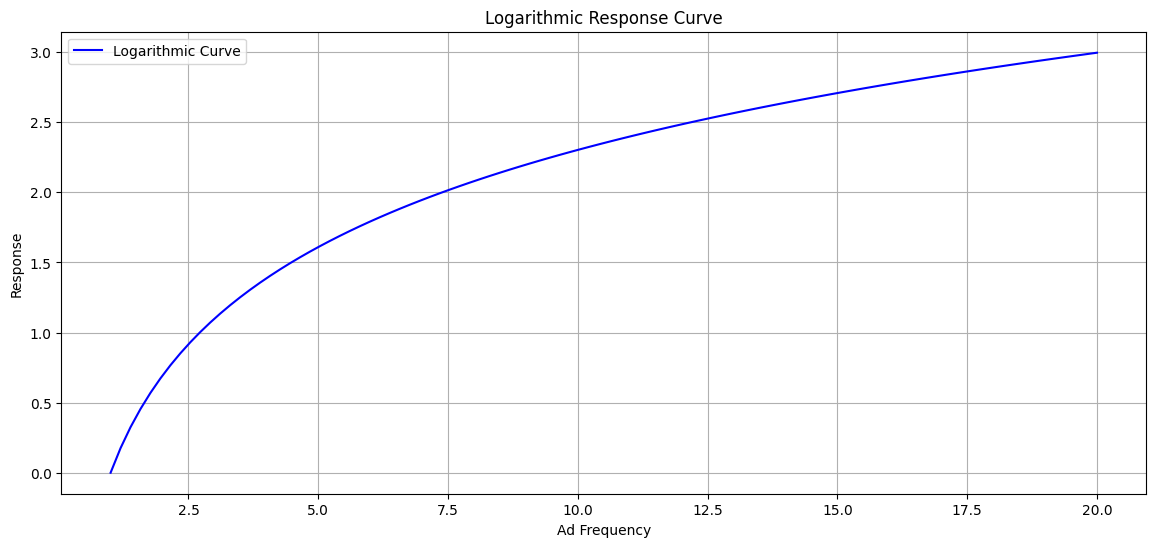

In [7]:


x_log = np.linspace(1, 20, 100)
y_log = np.log(x_log)

# Data for S-shaped (logistic) curve
def logistic(x, L=1, k=0.5, x0=10):
    return L / (1 + np.exp(-k * (x - x0)))

x_sigmoid = np.linspace(1, 20, 100)
y_sigmoid = logistic(x_sigmoid)

# Plotting the curves
plt.figure(figsize=(14, 6))

# Logarithmic Curve
plt.plot(x_log, y_log, label="Logarithmic Curve", color='blue')
plt.title("Logarithmic Response Curve")
plt.xlabel("Ad Frequency")
plt.ylabel("Response")
plt.grid(True)
plt.legend()
plt.show()


## S-shaped (Logistic) Curve


- `Characteristics`: The S-shaped curve has three phases: a slow start, rapid growth, and a plateau.


**Interpretation**

- Initial Phase: At low ad frequencies, the response is minimal. Few people respond after seeing the ad once or twice.

- Growth Phase: With moderate ad frequencies, the response rate accelerates. This is where most of the consumer action happens.

- Saturation Phase: At high ad frequencies, the response plateaus. Most of the responsive audience has already taken action, and additional exposures do not significantly increase the response.


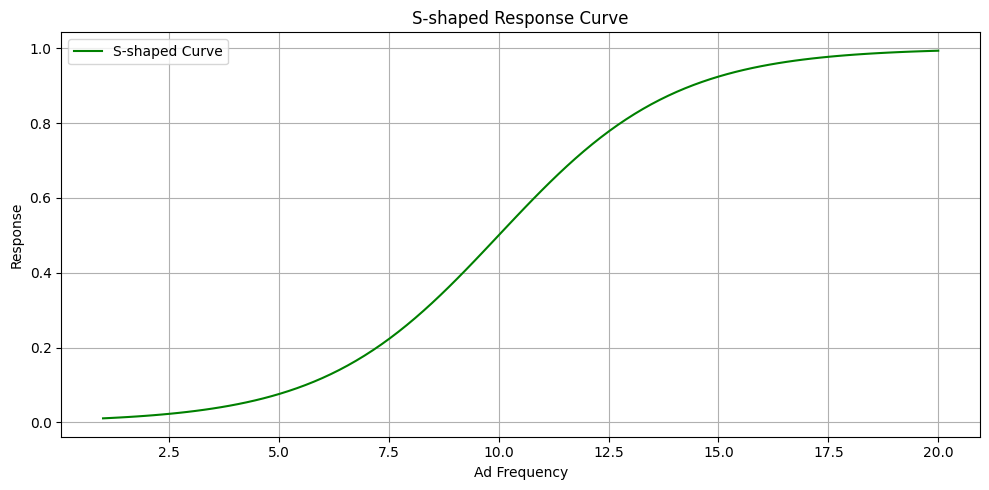

In [5]:
# S-shaped (Logistic) Curve
plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 2)
plt.plot(x_sigmoid, y_sigmoid, label="S-shaped Curve", color='green')
plt.title("S-shaped Response Curve")
plt.xlabel("Ad Frequency")
plt.ylabel("Response")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Define the Hill function

$$\text{Hill}(F, K, S) = \frac{F^S}{K^S + F^S}$$

Where:
- \( F \) is the frequency.
- \( K \) is the half-maximal effective concentration.
- \( S \) is the Hill coefficient which determines the steepness of the curve.


### Find optimal range


**Find the First Derivative:**

The first derivative of the Hill function gives the rate of change of incremental sales with respect to ad frequency.


**Find the Second Derivative:**

The second derivative helps identify the points of inflection, where the curvature changes from concave up to concave down.

**Determine Optimal Range**

The optimal range can be found by identifying the interval where the first derivative is high (indicating rapid growth) and the second derivative changes sign (indicating the start of diminishing returns).



In [3]:
def hill_function(F, K, S):
    return F**S / (K**S + F**S)

# Define the derivative of the Hill function
def hill_derivative(F, K, S):
    return (S * F**(S-1) * K**S) / (K**S + F**S)**2

# Define the second derivative of the Hill function
def hill_second_derivative(F, K, S):
    numerator = (S * (S-1) * F**(S-2) * K**S * (K**S + F**S)**2) - (S * F**(S-1) * K**S * 2 * (K**S + F**S) * S * F**(S-1))
    denominator = (K**S + F**S)**4
    return numerator / denominator

# # Calculate the second derivative of ROAS
# def roas_second_derivative(F, K, S):
#     y1 = hill_derivative(F, K, S) / cost_per_GRP
#     y2 = hill_second_derivative(F, K, S) / cost_per_GRP
#     return (y2 * ad_spend - y1 * cost_per_GRP) / ad_spend**2






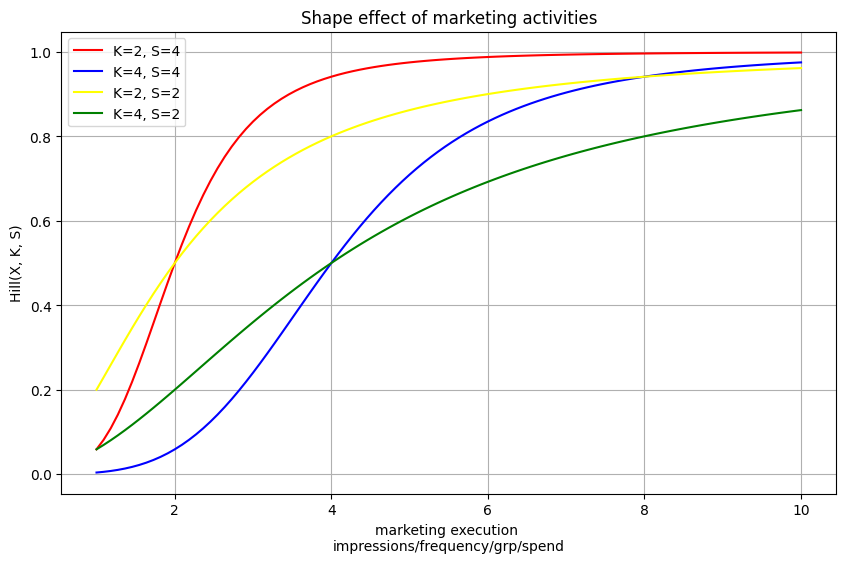

In [6]:


# Define the parameters for different curves
parameters = [
    (2, 4, 'red', 'K=2, S=4'),
    (4, 4, 'blue', 'K=4, S=4'),
    (2, 2, 'yellow', 'K=2, S=2'),
    (4, 2, 'green', 'K=4, S=2')
]

# Generate frequency values
freq_values = np.linspace(1, 10, 100)

# Plot the curves
plt.figure(figsize=(10, 6))

for K, S, color, label in parameters:
    hill_values = hill_function(freq_values, K, S)
    plt.plot(freq_values, hill_values, color=color, label=label)

plt.xlabel('marketing execution \nimpressions/frequency/grp/spend')
plt.ylabel('Hill(X, K, S)')
plt.title('Shape effect of marketing activities')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Parameters for the Hill function
K = 4
S = 4

# Frequency values
F_values = np.linspace(0, 10, 400)


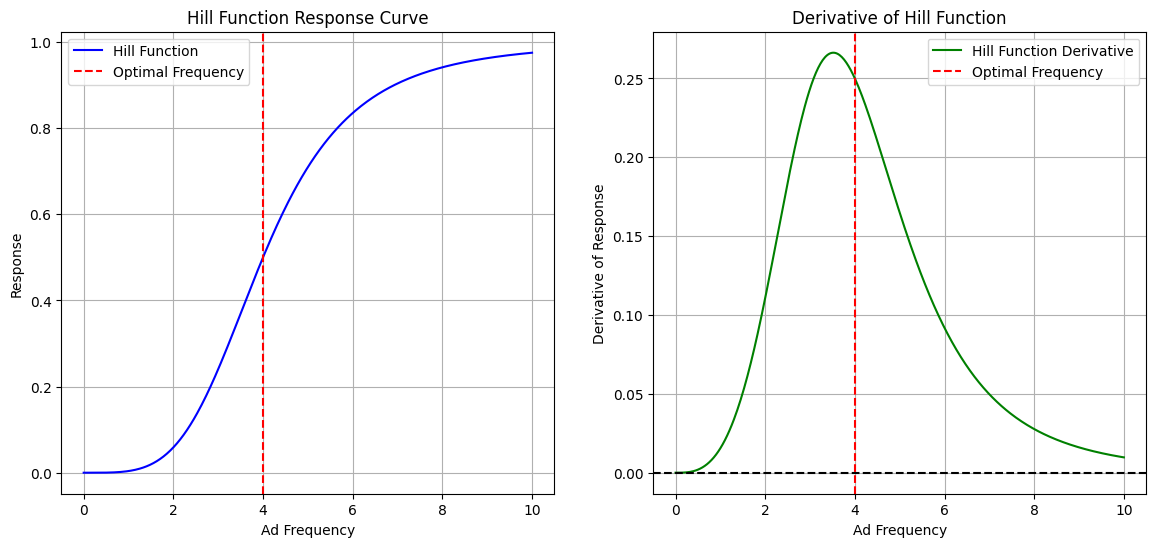

In [29]:


hill_values = hill_function(F_values, K, S)
derivative_values = hill_derivative(F_values, K, S)


# Plotting the Hill function and its derivative
plt.figure(figsize=(14, 6))

# Plot Hill function
plt.subplot(1, 2, 1)
plt.plot(F_values, hill_values, label='Hill Function', color='blue')
plt.axvline(x=K, color='red', linestyle='--', label='Optimal Frequency')
plt.title('Hill Function Response Curve')
plt.xlabel('Ad Frequency')
plt.ylabel('Response')
plt.legend()
plt.grid(True)


# Plot Hill function derivative
plt.subplot(1, 2, 2)
plt.plot(F_values, derivative_values, label='Hill Function Derivative', color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=K, color='red', linestyle='--', label='Optimal Frequency')
plt.title('Derivative of Hill Function')
plt.xlabel('Ad Frequency')
plt.ylabel('Derivative of Response')
plt.legend()
plt.grid(True)

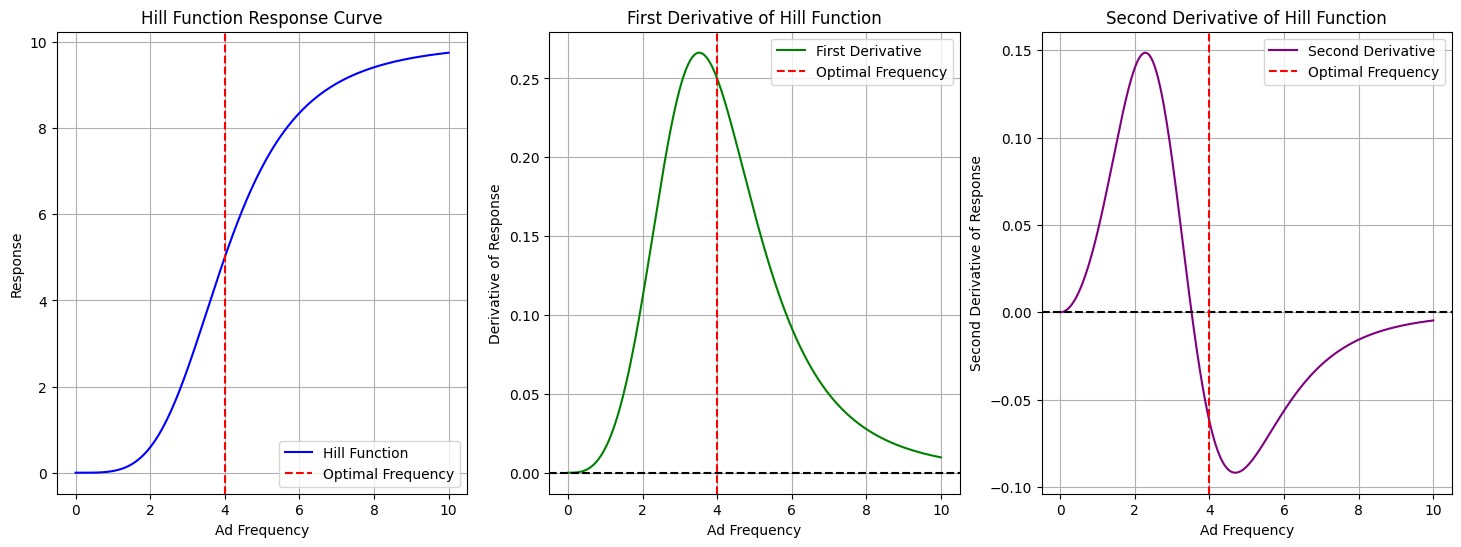

In [26]:
second_derivative_values = hill_second_derivative(F_values, K, S)


plt.figure(figsize=(18, 6))

# Plot Hill function
plt.subplot(1, 3, 1)
plt.plot(F_values, 10*hill_values, label='Hill Function', color='blue')
plt.axvline(x=K, color='red', linestyle='--', label='Optimal Frequency')
plt.title('Hill Function Response Curve')
plt.xlabel('Ad Frequency')
plt.ylabel('Response')
plt.legend()
plt.grid(True)

# Plot first derivative
plt.subplot(1, 3, 2)
plt.plot(F_values, derivative_values, label='First Derivative', color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=K, color='red', linestyle='--', label='Optimal Frequency')
plt.title('First Derivative of Hill Function')
plt.xlabel('Ad Frequency')
plt.ylabel('Derivative of Response')
plt.legend()
plt.grid(True)

# Plot second derivative
plt.subplot(1, 3, 3)
plt.plot(F_values, second_derivative_values, label='Second Derivative', color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=K, color='red', linestyle='--', label='Optimal Frequency')
plt.title('Second Derivative of Hill Function')
plt.xlabel('Ad Frequency')
plt.ylabel('Second Derivative of Response')
plt.legend()
plt.grid(True)